In [1]:
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA, TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy
from scipy.linalg import pinv
import pandas as pd

import itertools
import scipy.stats

import time

import warnings
warnings.filterwarnings('ignore')

# Data

# Clustering

## K-Means

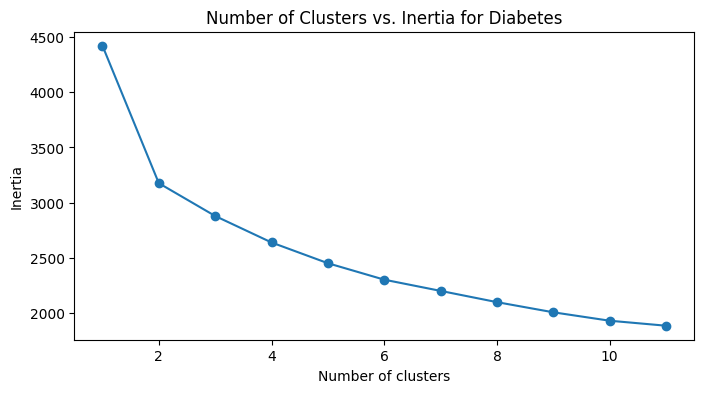

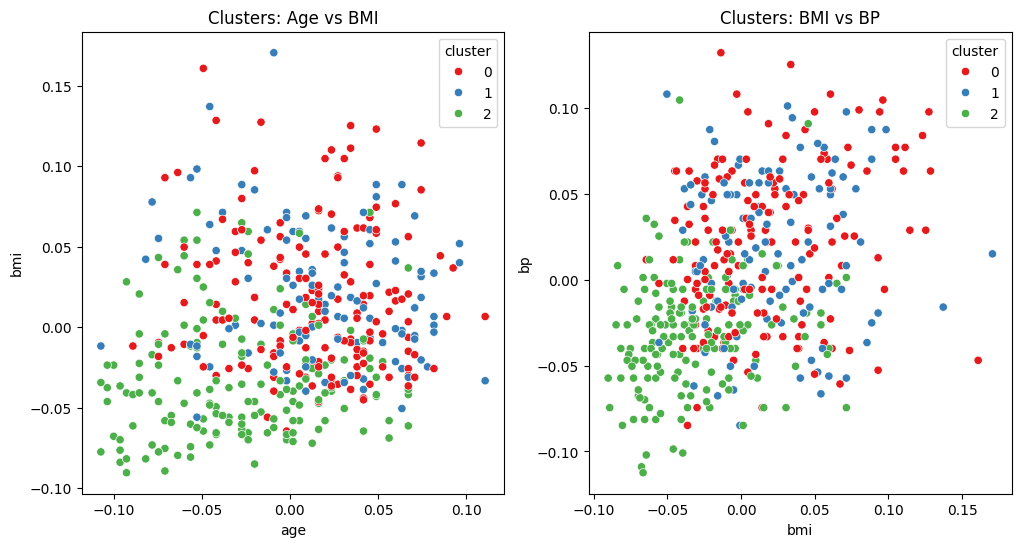

In [3]:
#DTBS
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 12)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia for Diabetes')
plt.savefig('diabetes_kmeans_inertia.png')
plt.show()

# Apply K-means clustering with the selected number of clusters (choose 3 based on visual inspection)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original data
data['cluster'] = clusters

# Plot the clusters using scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot of age vs bmi
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['age'], y=data['bmi'], hue=data['cluster'], palette='Set1')
plt.title('Clusters: Age vs BMI')

# Scatter plot of bmi vs bp
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['bmi'], y=data['bp'], hue=data['cluster'], palette='Set1')
plt.title('Clusters: BMI vs BP')
plt.savefig('diabetes_kmeans_clusters.png')

plt.show()



For n_clusters = 16 The average silhouette_score is : 0.1254495857134056


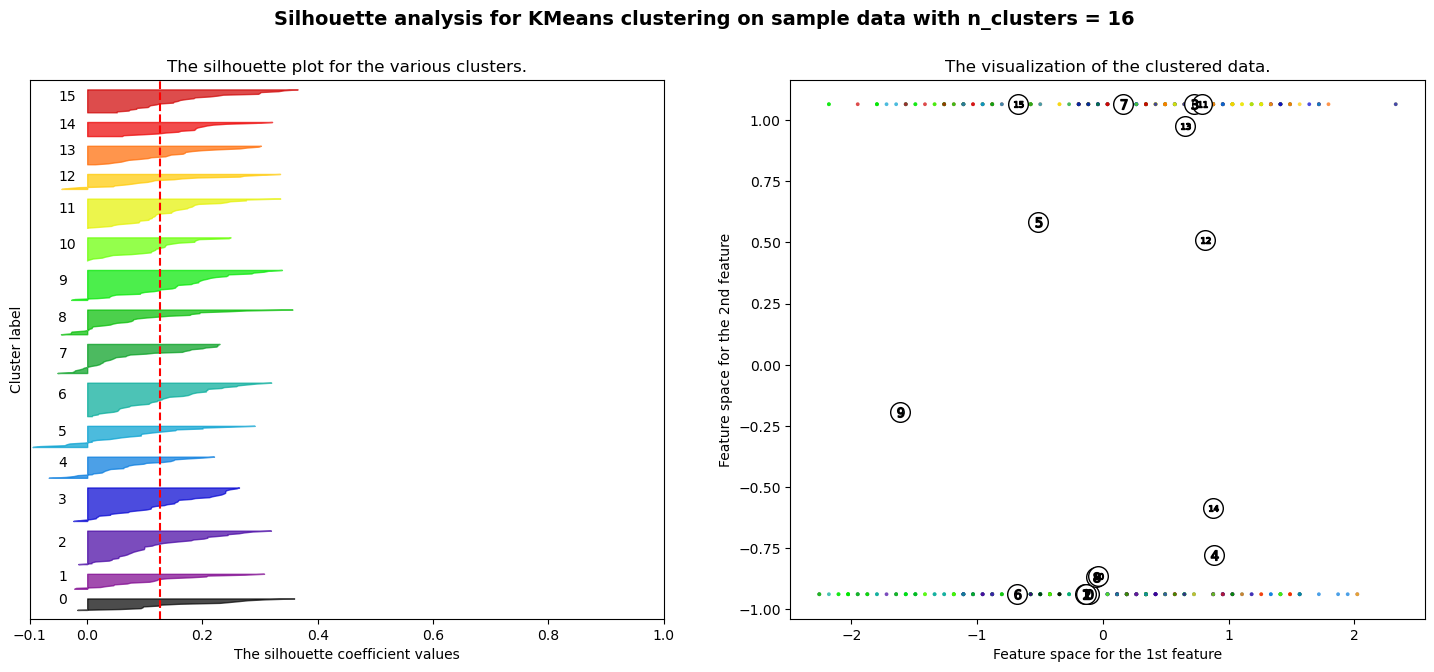

In [4]:
# Code taken from scikit-learn examples (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

range_n_clusters = [16]#np.arange(4, 5, 1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.savefig('diabetes_kmeans_silhouette.png')
plt.show()

## EM (GMM)

In [6]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X)
        bic[i][j] = gmm.bic(X)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 3
Lowest BIC currently for spherical 4
Lowest BIC currently for spherical 5
Lowest BIC currently for spherical 6
Lowest BIC currently for spherical 7
Lowest BIC currently for spherical 8
Lowest BIC currently for spherical 9
Lowest BIC currently for spherical 13
Lowest BIC currently for tied 1
Lowest BIC currently for tied 2
Lowest BIC currently for tied 3
Lowest BIC currently for tied 4
Lowest BIC currently for tied 5
Lowest BIC currently for tied 9
Lowest BIC currently for tied 10


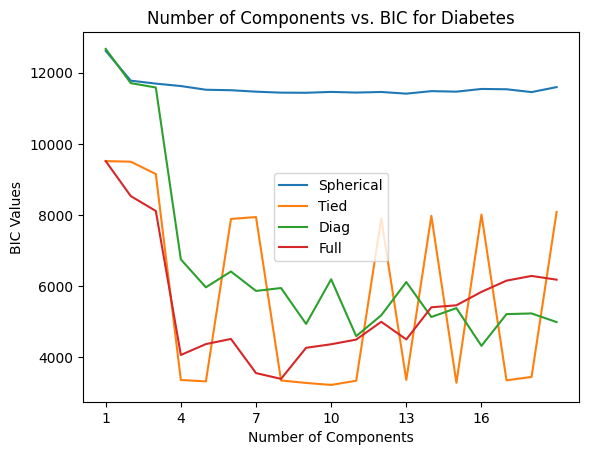

In [7]:
plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(np.arange(1,num_components_values[-1],3))
plt.title("Number of Components vs. BIC for Diabetes")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('diabetes_gmm_bic.png')
plt.show()

For n_clusters = 6 The average silhouette_score is : 0.034203139463412524


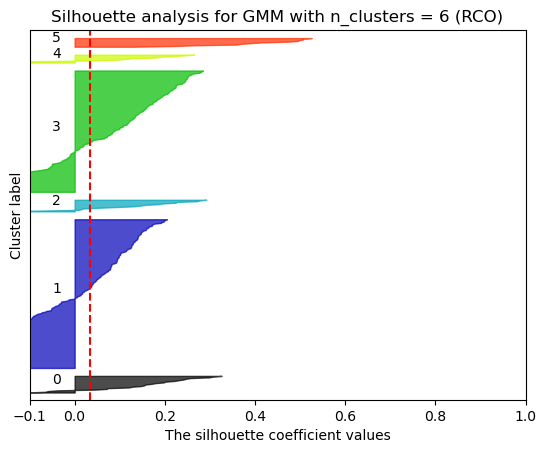

In [7]:
# Code taken from scikit-learn examples (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

range_n_clusters = np.arange(6, 7, 1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
#     fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette analysis for GMM with n_clusters = %d" % n_clusters)
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('diabetes_gmm_silhouette.png')
plt.show()

# Dimensionality Reduction

## PCA

In [9]:
pca = PCA()
pca.fit(X)

PCA()

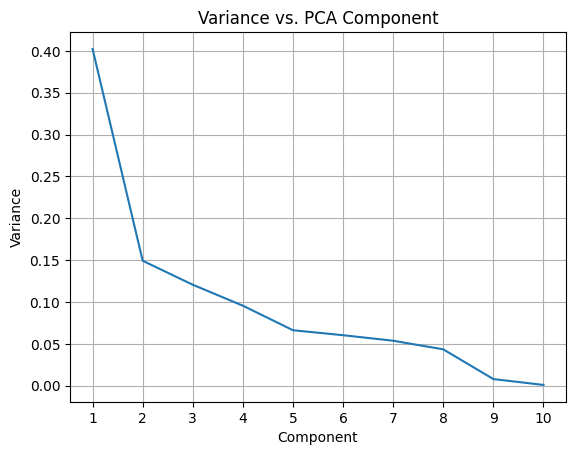

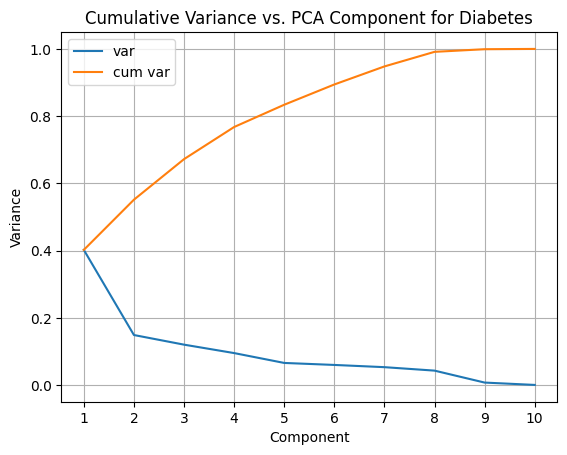

In [10]:
plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Variance vs. PCA Component')
plt.grid()

plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='var')
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), label='cum var')
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Cumulative Variance vs. PCA Component for Diabetes')
plt.legend()
plt.grid()
plt.savefig('diabetes_pca_variance.png')

In [11]:
X_PCA = PCA(n_components = 3).fit_transform(X)

## ICA

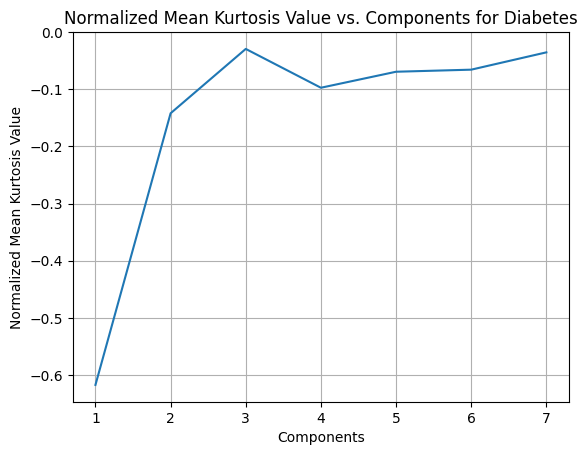

In [12]:
kurtosis_values = []
for i in range(1,8):
    X_ICA = FastICA(n_components = i).fit_transform(X)
    kur = scipy.stats.kurtosis(X_ICA)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(np.arange(1,8),kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.title('Normalized Mean Kurtosis Value vs. Components for Diabetes')
plt.grid()
plt.savefig('diabetes_ica_kurtosis.png')
plt.show()

In [13]:
X_ICA = FastICA(n_components = np.argmax(kurtosis_values)+1).fit_transform(X)

## RP

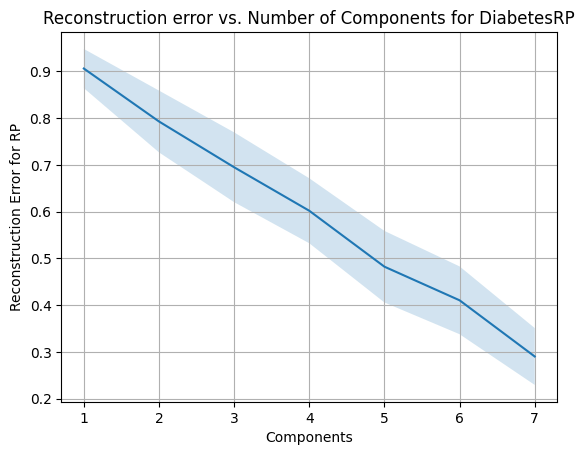

In [14]:
reconstruction_error = []
reconstruction_variance = []
for i in range(1,8):
    mean_mse = []
    for j in range(0,100):
        rp = GaussianRandomProjection(n_components=i)
        X_RP = rp.fit(X)
        w = X_RP.components_
        p = pinv(w)
        reconstructed = ((p@w)@(X.T)).T
        mean_mse.append(mean_squared_error(X,reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
plt.plot(np.arange(1,8),reconstruction_error)
plt.fill_between(np.arange(1,8),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error for RP')
plt.title('Reconstruction error vs. Number of Components for DiabetesRP')
plt.grid()
plt.savefig('diabetes_rp_error.png')
plt.show()

In [15]:
X_RP = GaussianRandomProjection(n_components = 3).fit_transform(X)

# Clustering with Dimensionality Reduction

## K-Means

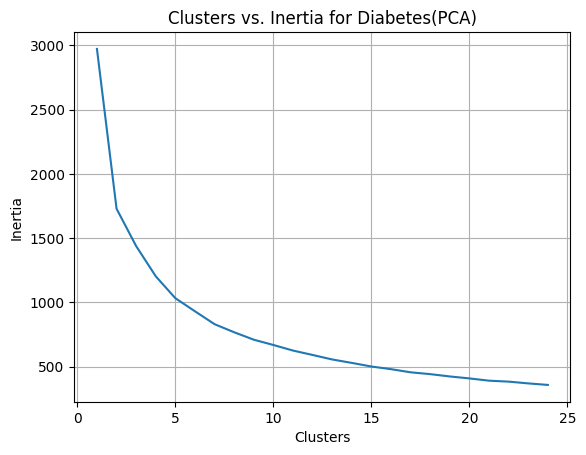

In [16]:
range_n_clusters = np.arange(1,25,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_PCA)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.plot(range_n_clusters,inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia for Diabetes(PCA)')
plt.grid()
plt.savefig('diabetes_inertia_pca.png')
plt.show()

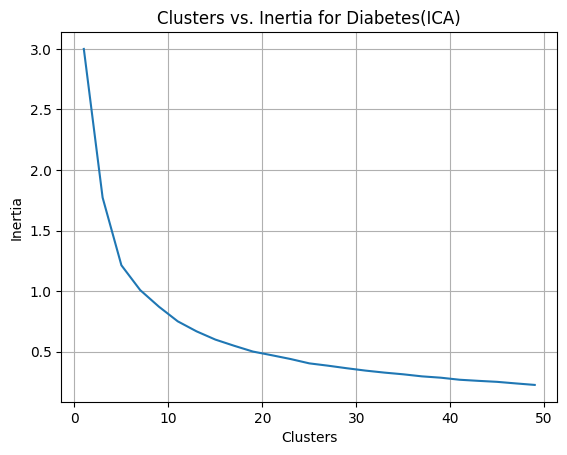

In [17]:
range_n_clusters = np.arange(1,50,2)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_ICA)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.plot(range_n_clusters,inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia for Diabetes(ICA)')
plt.grid()
plt.savefig('diabetes_inertia_ica.png')
plt.show()

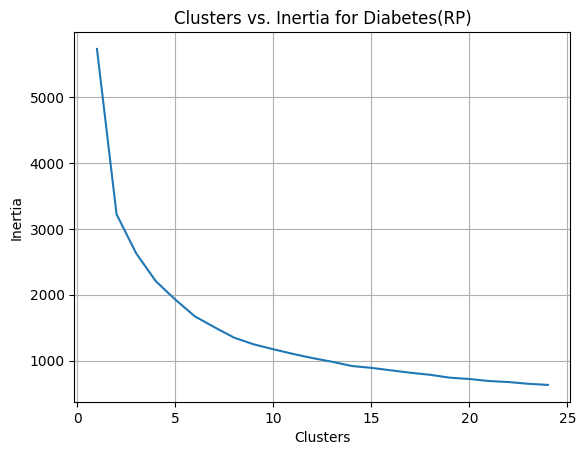

In [18]:
range_n_clusters = np.arange(1,25,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_RP)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.plot(range_n_clusters,inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia for Diabetes(RP)')
plt.grid()
plt.savefig('diabetes_inertia_rp.png')
plt.show()

## EM (GMM)

In [19]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_PCA)
        bic[i][j] = gmm.bic(X_PCA)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for diag 1


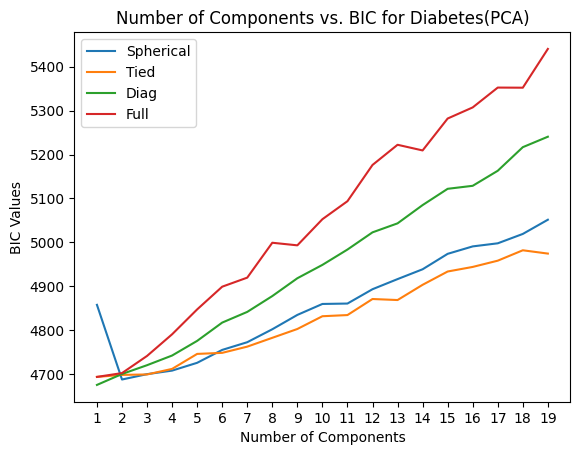

In [20]:
plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(num_components_values)
plt.title("Number of Components vs. BIC for Diabetes(PCA)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('diabetes_bic_pca.png')
plt.show()

Lowest BIC currently for spherical 1


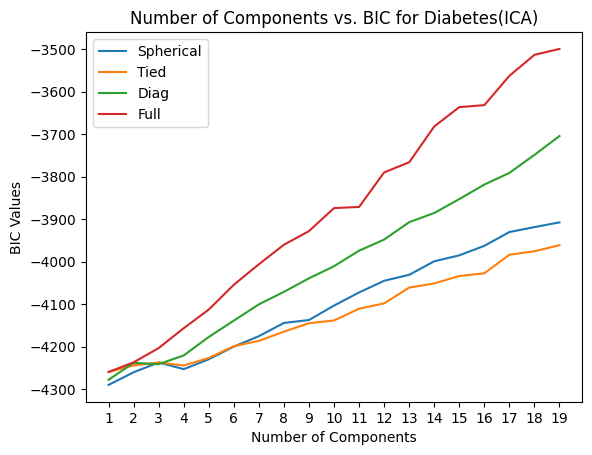

In [21]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_ICA)
        bic[i][j] = gmm.bic(X_ICA)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm

plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(num_components_values)
plt.title("Number of Components vs. BIC for Diabetes(ICA)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('diabetes_bic_ica.png')
plt.show()

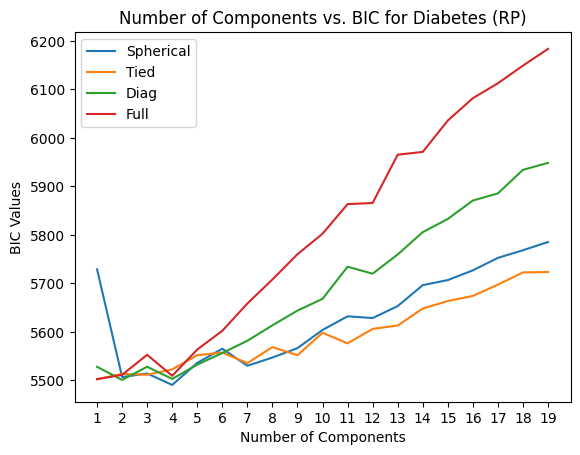

In [22]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_RP)
        bic[i][j] = gmm.bic(X_RP)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            best_gmm = gmm

plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(num_components_values)
plt.title("Number of Components vs. BIC for Diabetes (RP)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('diabetes_bic_rp.png')
plt.show()